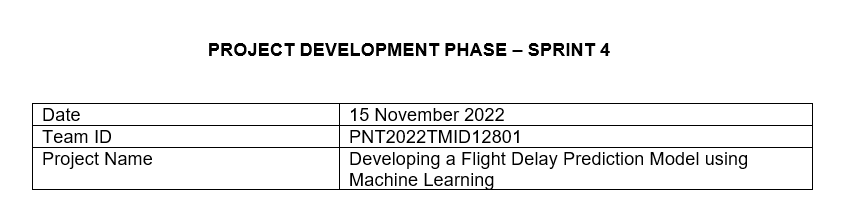

**Importing all the libraries**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [86]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Uduv0cM_2Z6a-R35O__XumphA0ZXA_ztzP4feuDTZcjY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelayprediction-donotdelete-pr-puonv3udgeu8gl'
object_key = 'flightdata (1).csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)
data.head()


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [46]:
df.describe()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
count,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000
mean,1334.325617,6.628973,15.790758,3.960199,15.067314,0.141483,0.139168,0.276022,0.195975,0.122340,0.225982,0.179681,0.286795,0.196866,0.116820,0.221975,0.177544
std,811.875227,3.354678,8.782056,1.995257,5.023534,0.348535,0.346138,0.447048,0.396967,0.327693,0.418246,0.383939,0.452285,0.397648,0.321219,0.415593,0.382146
min,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,624.000000,4.000000,8.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1267.000000,7.000000,16.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2032.000000,9.000000,23.000000,6.000000,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2853.000000,12.000000,31.000000,7.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [8]:
df['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

In [9]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'scatter plot between ARR_DELAY and ARR_DEL15')

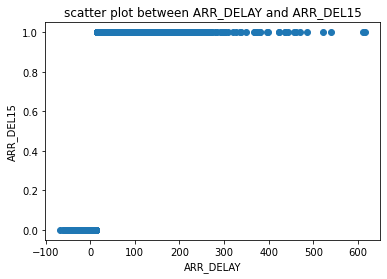

In [10]:
plt.scatter(df['ARR_DELAY'],df['ARR_DEL15'])
plt.xlabel('ARR_DELAY')
plt.ylabel('ARR_DEL15')
plt.title('scatter plot between ARR_DELAY and ARR_DEL15')

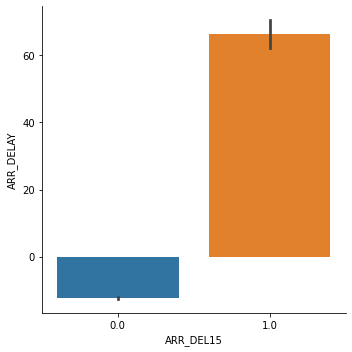

In [11]:
sns.catplot(x="ARR_DEL15",y="ARR_DELAY",kind='bar',data=df)

<AxesSubplot:>

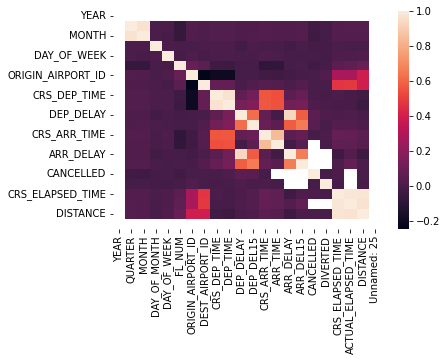

In [12]:
sns.heatmap(df.corr())

**Handling Missing Values**

In [13]:
df=df.drop('Unnamed: 25',axis=1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [14]:
df=df[["FL_NUM","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","ORIGIN","DEST","CRS_ARR_TIME","DEP_DEL15","ARR_DEL15"]]
df.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

In [15]:
df=df.fillna({'ARR_DEL15':1})
df=df.fillna({'DEP_DEL15':0})
df.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,0.0,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [16]:
import math

for index,row in df.iterrows():
    df.loc[index,'CRS_ARR_TIME']=math.floor(row['CRS_ARR_TIME']/100)
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
df['DEST']=le.fit_transform(df['DEST'])
df['ORIGIN']=le.fit_transform(df['ORIGIN'])

In [19]:
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
oh=OneHotEncoder()

In [23]:
x=df.iloc[:,0:8].values
y=df.iloc[:,8:9].values

In [24]:
z=oh.fit_transform(x[:,4:5]).toarray()
t=oh.fit_transform(x[:,5:6]).toarray()

In [26]:
z

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [27]:
t

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

**Label Encoding**

In [28]:
df=pd.get_dummies(df,columns=['ORIGIN','DEST'])
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,1,1,5,21,0.0,0.0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,14,0.0,0.0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,12,0.0,0.0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,13,0.0,0.0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,6,0.0,0.0,0,0,0,0,1,0,1,0,0,0


In [29]:
x=df.iloc[:,0:8].values
y=df.iloc[:,8:9].values

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
x_test.shape

(2247, 8)

In [32]:
x_train.shape

(8984, 8)

In [33]:
y_test.shape

(2247, 1)

In [34]:
y_train.shape

(8984, 1)

In [28]:
#decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc.score(x_test,y_test)

0.9906542056074766

In [36]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model=RandomForestClassifier(n_estimators=50,random_state=42)
model.fit(x_train,y_train)
model.score(x_test,y_test)

/tmp/wsuser/ipykernel_165/3023643624.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


0.8945260347129506

In [37]:
pd.DataFrame(model.predict(x_test)).value_counts()

0    1985
1     262
dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='sag')
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8019581664441477

In [39]:
lr.predict(x_test).sum()

0

In [40]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6822429906542056

In [47]:
pd.DataFrame(svm.predict(x_test)).value_counts()

0    1794
1     453
dtype: int64

In [48]:
pd.DataFrame(y_test).value_counts()

0    1802
1     445
dtype: int64

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.931909212283044

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1802
           1       0.90      0.53      0.66       445

    accuracy                           0.89      2247
   macro avg       0.90      0.76      0.80      2247
weighted avg       0.89      0.89      0.88      2247



In [53]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1802
           1       0.98      0.97      0.98       445

    accuracy                           0.99      2247
   macro avg       0.99      0.98      0.99      2247
weighted avg       0.99      0.99      0.99      2247



In [54]:
import pickle

**SAVING THE MODEL**


In [78]:
pickle.dump(knn,open("flight.pkl",'wb'))

In [79]:
!pip install ibm_watson_machine_learning

In [80]:
from ibm_watson_machine_learning import APIClient

In [81]:
import json

In [82]:
import numpy as np

**IBM CLOUD DEPLOYMENT**

In [87]:
wml_cred={
 "apikey":"Uduv0cM_2Z6a-R35O__XumphA0ZXA_ztzP4feuDTZcjY",
 "url":"https://us-south.ml.cloud.ibm.com"
}

In [88]:
wml_clients=APIClient(wml_cred)

In [89]:
wml_clients.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
70d44994-9879-4777-a2d2-a83a79c326ac  models  2022-11-13T12:03:52.875Z
------------------------------------  ------  ------------------------


In [90]:
space_id="70d44994-9879-4777-a2d2-a83a79c326ac"

In [91]:
wml_clients.set.default_space(space_id)

'SUCCESS'

In [92]:
wml_clients.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [93]:
MODEL_NAME="RandomForestClassifier()"
DEPLOYMENT_NAME="flight delay"
DEMO_MODEL=model

In [94]:
soft_sepc_id=wml_clients.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [95]:
model_props={
 wml_clients.repository.ModelMetaNames.NAME:MODEL_NAME,
 wml_clients.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
 wml_clients.repository.ModelMetaNames.SOFTWARE_SPEC_UID: soft_sepc_id
 
}

In [99]:
wml_clients.set.default_project("9574c591-01f0-4448-875a-8a3410a83c34")

Unsetting the space_id ...


'SUCCESS'

In [105]:
wml_clients.set.default_space("70d44994-9879-4777-a2d2-a83a79c326ac")

Unsetting the project_id ...


'SUCCESS'

In [106]:
model_details=wml_clients.repository.store_model(
    model=DEMO_MODEL
    ,meta_props=model_props
    ,training_data=x_train,
 training_target=y_train)

In [107]:
model_details
model_id=wml_clients.repository.get_model_id(model_details)
dep_props={
 wml_clients.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
 wml_clients.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [ ]:
deployment=wml_clients.deployments.create(artifact_uid=model_id,meta_props=dep_props)